# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## What is Computer Vision?

**Computer Vision** is a field of Artificial Intelligence that enables computers to interpret and make decisions based on visual data—such as images or videos—much like a human would. It's widely used in many industries: from self-driving cars to medical imaging, surveillance, augmented reality, and more.

### 🧠 Human Vision vs. Computer Vision
- **Human Vision**: Instinctively uFigure - available from: International Journal of Machine Learning and Cyberneticsmathematical models, and algorithms to interpret pixel information.


## 📸 Common Tasks in Computer Vision

| Task | Description | Output |
|------|-------------|--------|
| **Image Classification** | Assign a label to an entire image | e.g. "cat", "car" |
| **Object Detection** | Identify and locate objects in an image | Bounding boxes + labels |
| **Semantic Segmentation** | Assign a label to each pixel | Pixel-wise mask |
| **Instance Segmentation** | Segment different instances of the same class | Pixel-wise + individual mask |
| **Pose Estimation** | Detect body joints and keypoints | Coordinates over human shapes |
| **Face Recognition** | Identify or verify a person by facial features | ID or match score |


## 🔧 How It Works

Computer vision models are typically powered by **Convolutional Neural Networks (CNNs)**, a class of deep neural networks that are particularly effective at learning from image data.

### 🧱 Convolutional Neural Network (CNN) Basics
- **Convolution layers** extract patterns like edges and textures
- **Pooling layers** downsample features to reduce computation
- **Fully connected layers** interpret features for classification or regression

Here's a simplified pipeline:
```
Input Image → Convolution → ReLU → Pooling → … → Flatten → Fully Connected → Output
```


## 🧰 Applications in Real Life
- **Healthcare**: Tumor detection, MRI segmentation
- **Autonomous Driving**: Lane detection, obstacle avoidance
- **Retail**: Checkout-free stores, customer behavior analysis
- **Security**: Surveillance, facial recognition
- **Social Media**: Tag suggestions, content moderation


## 🧪 In This Notebook
You will explore three key tasks:
- 🏷️ **Classification** with CIFAR-10 dataset
- 🔍 **Detection** using Faster R-CNN
- 🎨 **Segmentation** using DeepLabV3

And complete a 🎯 **Final Project**: Real-time webcam classification using a pretrained MobileNet.



# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## Load and display a visual summary of vision tasks

This image illustrates the difference between common computer vision tasks such as classification, detection, and segmentation.

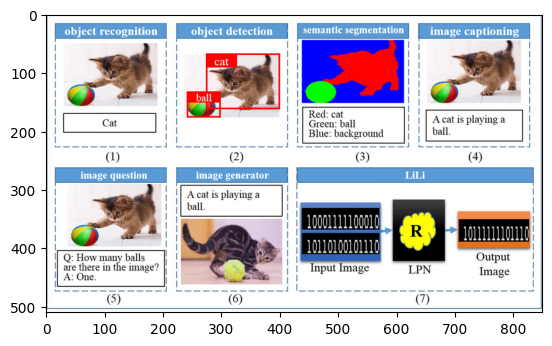

In [31]:

import matplotlib.pyplot as plt

img = Image.open("The-differences-among-these-popular-computer-vision-tasks-1-Object-recognition.png")
plt.imshow(img)


# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## Section : Image Augmentation

###  Common Image Augmentation Methods

Image augmentation techniques are used to artificially increase the diversity of the training set by applying transformations to existing images. These methods help models generalize better by simulating variations in lighting, orientation, scale, and more.

#### 🔄 Common Techniques
- **Flipping** (horizontal/vertical)
- **Rotation** (random degrees)
- **Cropping** (random crops, center crops)
- **Scaling and Zooming**
- **Color Jitter** (brightness, contrast, saturation)
- **Blurring or Sharpening**
- **Adding Noise**

### 14.1.2 Training with Image Augmentation

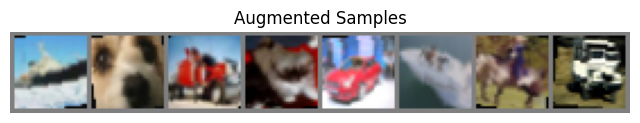

In [32]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Visualize samples
import matplotlib.pyplot as plt
import torchvision

data_iter = iter(train_loader)
images, labels = next(data_iter)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title("Augmented Samples")
    plt.axis("off")
    plt.show()

imshow(torchvision.utils.make_grid(images))

### Summary
- Augmentation helps avoid overfitting.
- Simple transformations can significantly improve generalization.
- It is standard practice in image classification pipelines.

### Exercises

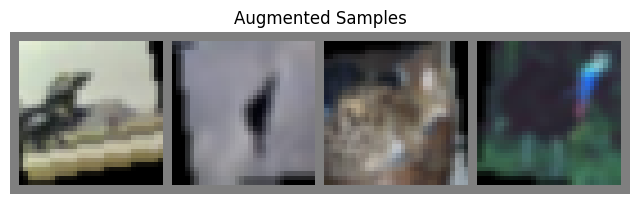

In [33]:
# EXERCISE 1: Try using transforms.GaussianBlur and transforms.RandomAffine

aug_experiment = transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

aug_dataset = datasets.CIFAR10(root="./data", train=True, download=False, transform=aug_experiment)
aug_loader = DataLoader(aug_dataset, batch_size=4, shuffle=True)

imgs, _ = next(iter(aug_loader))
imshow(torchvision.utils.make_grid(imgs))

In [2]:
from torchvision.utils import save_image
import os

os.makedirs("augmented_samples", exist_ok=True)
for i in range(10):
    imgs, _ = next(iter(aug_loader))
    save_image(imgs, f"augmented_samples/batch_{i}.png")


# EXERCISE : Compare model performance with/without augmentation on a subset of CIFAR-10

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define a small CNN
class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

# Data transforms
basic_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Use only a small subset of CIFAR-10
subset_indices = list(range(1000))
basic_dataset = Subset(datasets.CIFAR10('./data', train=True, download=True, transform=basic_transform), subset_indices)
aug_dataset = Subset(datasets.CIFAR10('./augmented_samples', train=True, download=False, transform=aug_transform), subset_indices)

basic_loader = DataLoader(basic_dataset, batch_size=32, shuffle=True)
aug_loader = DataLoader(aug_dataset, batch_size=32, shuffle=True)

def train_model(dataloader, epochs=3):
    model = TinyCNN()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(epochs):
        running_loss = 0
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Loss={running_loss:.3f}, Accuracy={acc:.2f}%")
    return model

print("Training WITHOUT augmentation:")
train_model(basic_loader)

print("Training WITH augmentation:")
train_model(aug_loader)

RuntimeError: Dataset not found or corrupted. You can use download=True to download it

In [35]:
# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## Introduction
#In this notebook, you'll learn the fundamentals of computer vision tasks using deep learning: classification, object detection, and image segmentation. We use PyTorch and popular open datasets for demonstration.

# Required Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import urllib.request
import cv2



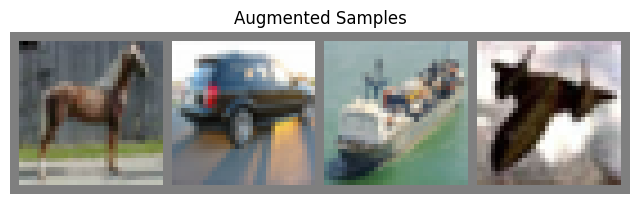

horse automobile ship airplane
[Epoch 1, Batch 2000] loss: 2.233
[Epoch 1, Batch 4000] loss: 1.962
[Epoch 1, Batch 6000] loss: 1.748
[Epoch 1, Batch 8000] loss: 1.649
[Epoch 1, Batch 10000] loss: 1.559
[Epoch 1, Batch 12000] loss: 1.498
[Epoch 2, Batch 2000] loss: 1.427
[Epoch 2, Batch 4000] loss: 1.401
[Epoch 2, Batch 6000] loss: 1.373
[Epoch 2, Batch 8000] loss: 1.330
[Epoch 2, Batch 10000] loss: 1.312
[Epoch 2, Batch 12000] loss: 1.300
Finished Training


In [37]:
# SECTION 1: Image Classification
## Goal: Predict the class of the main object in an image.

# Load and preprocess CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

classes = trainset.classes

# Visualize some images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Simple CNN model for classification
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNN()

# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')




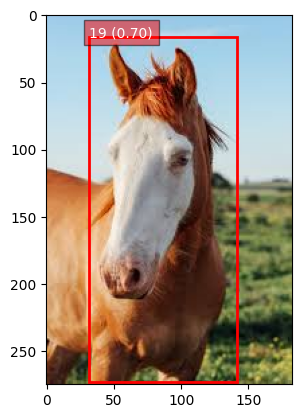

In [38]:
# SECTION 2: Object Detection with Pretrained Faster R-CNN
## Goal: Localize and classify objects in an image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms.functional import to_tensor

# Load pretrained model
detector = fasterrcnn_resnet50_fpn(pretrained=True)
detector.eval()

# Load a test image
img_path = 'horse1.jpeg'  # replace with an actual image
img = Image.open(img_path).convert('RGB')
input_tensor = to_tensor(img)

# Make prediction
with torch.no_grad():
    prediction = detector([input_tensor])[0]

# Visualize detections
import matplotlib.patches as patches
fig, ax = plt.subplots(1)
ax.imshow(img)
for box, label, score in zip(prediction['boxes'], prediction['labels'], prediction['scores']):
    if score > 0.5:
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1], f'{label.item()} ({score:.2f})', color='white', bbox=dict(facecolor='red', alpha=0.5))
plt.show()




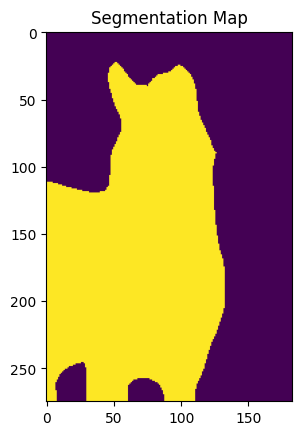

KeyboardInterrupt: 

In [39]:
# SECTION 3: Image Segmentation with DeepLabV3
## Goal: Assign a class to each pixel
from torchvision.models.segmentation import deeplabv3_resnet50

segmentor = deeplabv3_resnet50(pretrained=True)
segmentor.eval()

with torch.no_grad():
    output = segmentor(input_tensor.unsqueeze(0))['out'][0]
    predicted = output.argmax(0)

plt.imshow(predicted)
plt.title('Segmentation Map')
plt.show()



In [ ]:
# FINAL PROJECT: Real-time webcam image classification with a pretrained MobileNet
## Goal: Classify webcam input in real-time using a lightweight model
mobilenet = models.mobilenet_v2(pretrained=True)
mobilenet.eval()

# Load labels safely
label_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
label_path = "imagenet_classes.txt"

if not os.path.exists(label_path):
    urllib.request.urlretrieve(label_url, label_path)

with open(label_path) as f:
    imagenet_labels = [line.strip() for line in f.readlines()]

cap = cv2.VideoCapture(0)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

while True:
    ret, frame = cap.read()
    if not ret:
        break
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_tensor = transform(img_pil).unsqueeze(0)
    with torch.no_grad():
        output = mobilenet(input_tensor)
    _, predicted = torch.max(output, 1)
    label = imagenet_labels[predicted.item()]
    cv2.putText(frame, label, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.imshow('Webcam Classification', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 🧠 Final Project Idea: “Smart Sorting Assistant”  
**Goal:** Build a tool that classifies images of trash into categories: *plastic*, *paper*, *metal*, *organic*, or *other*. This mimics a smart recycling bin system.

### 🔍 Objectives  
- Apply **transfer learning** using a pretrained CNN (e.g. ResNet18 or MobileNetV2).
- Add a **custom classification head** for your five waste categories.
- Perform **image augmentation** to improve generalization.
- Include a **user upload interface** (e.g. via `ipywidgets`) or webcam integration.
- Visualize predictions with **confidence scores**.

### 🗂️ Dataset  
Use the [TrashNet dataset](https://github.com/garythung/trashnet) or create a small custom dataset with folders like:  
```
trash_dataset/
    plastic/
    paper/
    metal/
    organic/
    other/
```

### 🧰 Code Template (Sample Cells to Add)

**1. Load Pretrained Model + Modify Head**
```python
from torchvision import models

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5)  # 5 waste classes
```

**2. Prepare DataLoader**
```python
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Resize, Normalize, RandomHorizontalFlip

transform = Compose([
    Resize((224, 224)),
    RandomHorizontalFlip(),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = ImageFolder(root="trash_dataset", transform=transform)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
```

**3. Add Webcam or Upload Prediction Cell**
```python
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)
```

**4. Show Output**
```python
# After predicting
plt.imshow(img_tensor.permute(1, 2, 0))
plt.title(f"Prediction: {class_name} ({confidence:.1f}%)")
plt.axis("off")
plt.show()
```


git clone https://github.com/garythung/trashnet.git

Move or extract the contents to:

trash_dataset/
    cardboard/
    glass/
    metal/
    paper/
    plastic/
    trash/

(Optional) Merge or rename folders to match:
    cardboard → paper
    glass → other
    trash → other

In [22]:
import os

categories = ["plastic", "paper", "metal", "organic", "other"]
for cat in categories:
    os.makedirs(f"trash_dataset/{cat}", exist_ok=True)



### Step 1: Load and Prepare Data

In [23]:
from PIL import Image as PILImage
import os

categories = ["plastic", "paper", "metal", "organic", "other"]
for cat in categories:
    dir_path = f"trash_dataset/{cat}"
    os.makedirs(dir_path, exist_ok=True)
    img_path = os.path.join(dir_path, "sample.jpg")
    if not os.path.exists(img_path):
        PILImage.new("RGB", (224, 224), color=(255, 0, 0)).save(img_path)

from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Resize, Normalize, RandomHorizontalFlip
from torch.utils.data import DataLoader

transform = Compose([
    Resize((224, 224)),
    RandomHorizontalFlip(),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = ImageFolder(root="trash_dataset", transform=transform)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
class_names = dataset.classes


### Step 2: Modify and Train Model

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5)  # Five trash classes
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified)
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {running_loss / len(train_loader):.4f}")

/home/anne/anaconda3/envs/ml2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 - Loss: 1.9854
Epoch 2 - Loss: 1.7328
Epoch 3 - Loss: 1.6235
Epoch 4 - Loss: 1.6510
Epoch 5 - Loss: 1.6269


### Step 3: Predict from Uploaded Image

# pip install ipywidgets

In [28]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload')

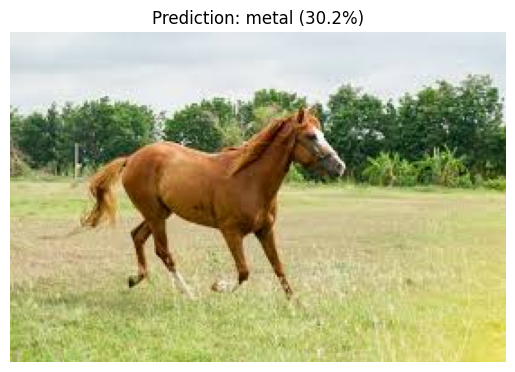

In [30]:
if uploader.value:
    uploaded_file = next(iter(uploader.value.values())) if hasattr(uploader.value, 'values') else uploader.value[0]
    content = uploaded_file['content']
    img = Image.open(io.BytesIO(content)).convert("RGB")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_tensor = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)
        class_name = class_names[predicted.item()]
        confidence = torch.nn.functional.softmax(output, dim=1)[0][predicted].item() * 100

    plt.imshow(img)
    plt.title(f"Prediction: {class_name} ({confidence:.1f}%)")
    plt.axis("off")
    plt.show()
else:
    print("Please upload an image to classify.")

You can deploy it with a webcam or use `gradio` or `streamlit` for a small app.